
# [🟡 **- Working on It**] [🔴 **- Not Attempted Yet**]

## Imports and Loading Datasets

In [1]:
!pip install alibi
!pip install pyale

In [2]:
# mount drive - to access files from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline

# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from PyALE import ale
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# load  boston housing data - https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# display completion message - done as an indicator is errors occur
if data is not None:
    print("----- <Boston Housing Dataset Loaded Successfully> -----")

target = raw_df.values[1::2, 2]
# display completion message - done as an indicator is errors occur
if target is not None:
    print("----- <Boston Housing Target Loaded Successfully> -----\n")


# load titanic dataset
titanic_train_df = pd.read_csv("/content/drive/MyDrive/Third Year/ARI3205 - InterpretableAI_Project/Colab Notebooks/titanicDataset/train.csv")
# display completion message - done as an indicator is errors occur
if titanic_train_df is not None:
    print("----- <Titanic Training Dataset Loaded Successfully> -----")

titanic_test_df = pd.read_csv("/content/drive/MyDrive/Third Year/ARI3205 - InterpretableAI_Project/Colab Notebooks/titanicDataset/test.csv")
# display completion message - done as an indicator is errors occur
if titanic_test_df is not None:
    print("----- <Titanic Testing Dataset Loaded Successfully> -----")


----- <Boston Housing Dataset Loaded Successfully> -----
----- <Boston Housing Target Loaded Successfully> -----

----- <Titanic Training Dataset Loaded Successfully> -----
----- <Titanic Testing Dataset Loaded Successfully> -----


## Boston Feed Forward Neural Network

### Handling Data

In [ ]:
# ensuring the data is numeric
data_features = data.astype(float)
data_target = target.astype(float)

# splitting the dataset into training and testing sets with an 80/20 split
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(data_features, data_target, test_size=0.2, random_state=42)

# standardizing the features
scaler_boston = StandardScaler()
X_train_boston_scaled = scaler_boston.fit_transform(X_train_boston)
X_test_boston_scaled = scaler_boston.transform(X_test_boston)

### Training Model

In [ ]:
# define and train MLPRegressor model
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

# train model
mlp_regressor.fit(X_train_boston_scaled, y_train_boston)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

### Evaluating Model

In [ ]:
# get model predictions
predictions_boston = mlp_regressor.predict(X_test_boston_scaled)

# calculate Mean Squared Error and Mean Absolute Error
mse_boston = mean_squared_error(y_test_boston, predictions_boston)
mae_boston = mean_absolute_error(y_test_boston, predictions_boston)

# display
print(f"Boston Housing Mean Squared Error: {round(mse_boston, 4)}")
print(f"Boston Housing Mean Absolute Error: {round(mae_boston, 4)}")

Boston Housing Mean Squared Error: 12.3856
Boston Housing Mean Absolute Error: 2.2701


## Titanic Feed Forward Neural Network

### Handling Data

In [ ]:
# Handle missing values
titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean(), inplace=True)
titanic_train_df['Embarked'].fillna(titanic_train_df['Embarked'].mode()[0], inplace=True)

# Drop columns that are not needed for prediction
titanic_train_df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

# Convert categorical columns to numeric using one-hot encoding
titanic_train_df = pd.get_dummies(titanic_train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Separate features and target
X_titanic = titanic_train_df.drop(columns=['Survived'])
y_titanic = titanic_train_df['Survived']

# split the dataset into training and testing sets with 80/20 split
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# standardizing the features
scaler_titanic = StandardScaler()
X_train_titanic_scaled = scaler_titanic.fit_transform(X_train_titanic)
X_test_titanic_scaled = scaler_titanic.transform(X_test_titanic)

<ipython-input-13-8c38d39d9a4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean(), inplace=True)
<ipython-input-13-8c38d39d9a4f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

### Training Model

In [ ]:
# define and train MLPClassifier model
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

# train model
mlp_classifier.fit(X_train_titanic_scaled, y_train_titanic)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

### Evaluating Model

In [ ]:
# get model predictions
predictions_titanic = mlp_classifier.predict(X_test_titanic_scaled)

# get accuracy score
accuracy_titanic = accuracy_score(y_test_titanic, predictions_titanic)

# display
print(f"Titanic Test Accuracy: {round((accuracy_titanic * 100), 2)}%")

Titanic Test Accuracy: 80.45%


## 1. Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots - 🟡


### a and b. Use PDP to examine the average effect of at least two features and Use ICE plots to explore individual predictions for at least two features.

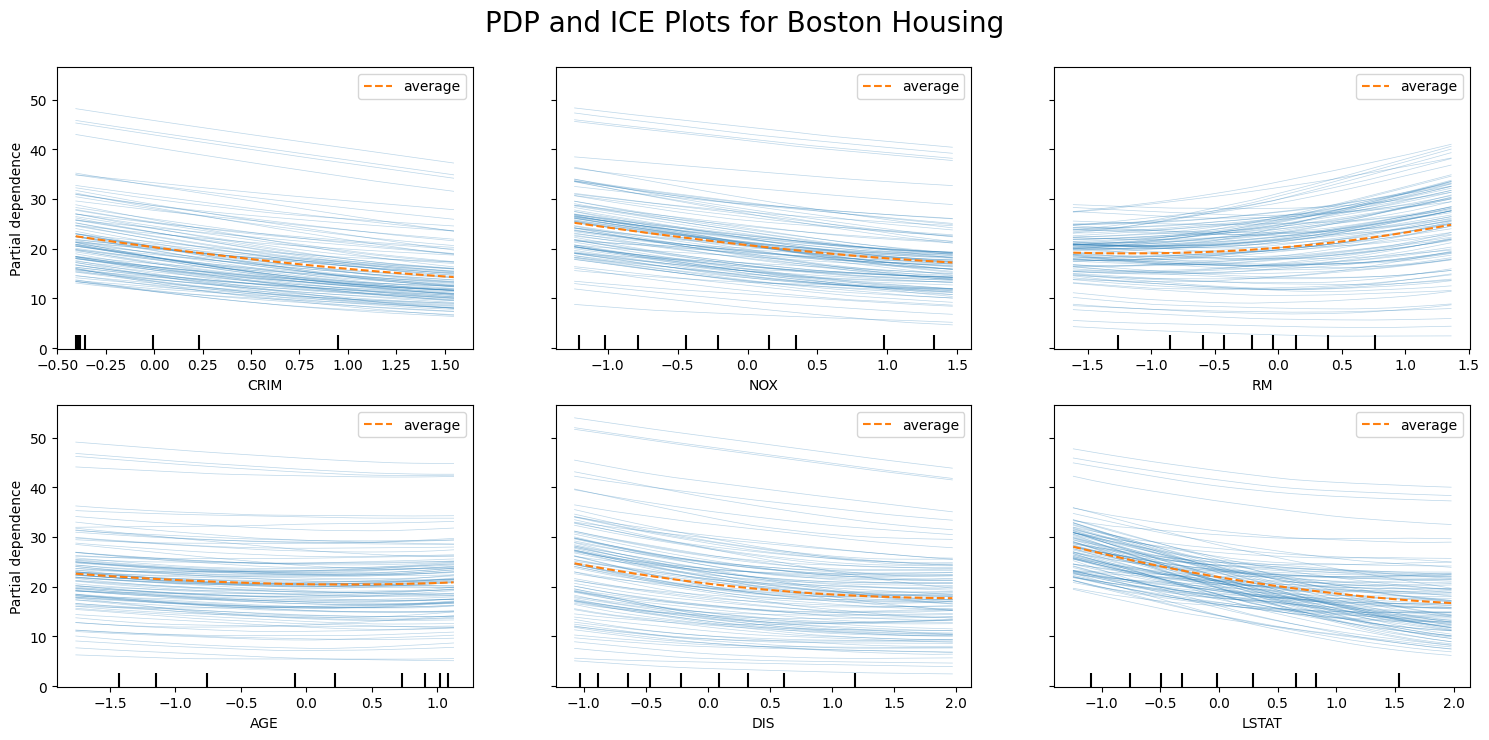

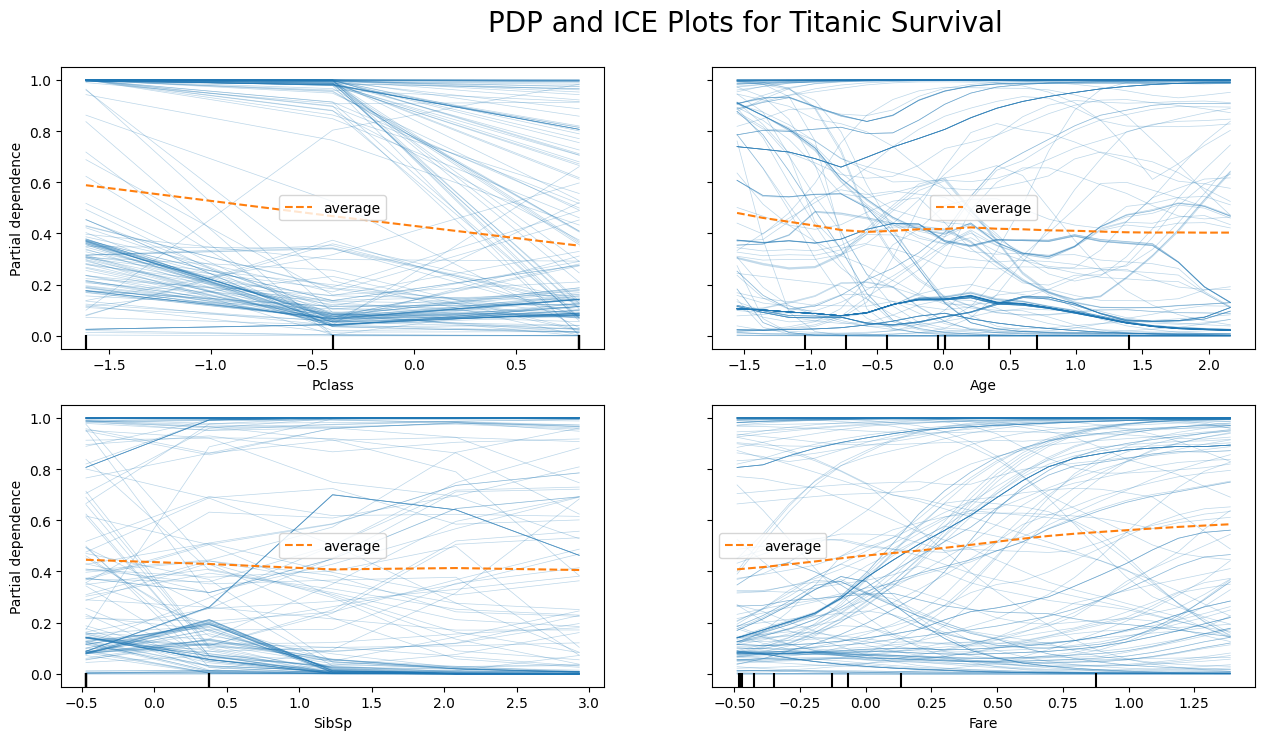

In [ ]:
# PDP for Boston Housing
feature_names_boston = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

fig, ax = plt.subplots(figsize=(15, 8))

PartialDependenceDisplay.from_estimator(
    mlp_regressor,
    X_test_boston_scaled,
    features=[0, 4, 5, 6, 7, 12],  # indices for 'CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'LSTAT'
    feature_names=feature_names_boston,
    grid_resolution=20,
    n_cols=3,  # plots in 2 rows of 3 columns for better alignment
    kind='both',  # both PDP and ICE
    ax=ax,
)

plt.suptitle('PDP and ICE Plots for Boston Housing', fontsize=20, y=0.95)  # Main title with adjusted y-position
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # ensures no overlap
plt.show()


print("\n")


# PDP for Titanic
feature_names_titanic = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

fig, ax = plt.subplots(figsize=(15, 8))

PartialDependenceDisplay.from_estimator(
    mlp_classifier,
    X_test_titanic_scaled,
    features=[0, 1, 2, 4],  # indices for 'Pclass', 'Age', 'SibSp', 'Fare'
    feature_names=feature_names_titanic,
    grid_resolution=20,
    n_cols=2,  # plots in 2 rows of 2 columns
    kind='both',  # both PDP and ICE
    ax=ax,
)

plt.suptitle('PDP and ICE Plots for Titanic Survival', fontsize=20, y=0.95)  # Adjusted y-position
plt.tight_layout(rect=[0, 0.03, 0.85, 0.95])  # ensures no overlap
plt.show()

### c. Explain what insights PDP and ICE give about the model’s behaviour.

----- <> -----

## 2. Permutation Feature Importance (PFI) - 🟡

### a. Use PFI to identify the most important features in the model.

In [ ]:
print("\n----- <Boston PFI> -----")

# permutation Feature Importance for Boston Housing
pfi_result_boston = permutation_importance(mlp_regressor, X_test_boston_scaled, y_test_boston, n_repeats=10, random_state=42)

# display feature importances
for i, feature_name in enumerate(feature_names_boston):
    print(f"{feature_name}: {round(pfi_result_boston.importances_mean[i], 4)}")

print("\n----- <Titanic PFI> -----")

# permutation Feature Importance for Boston Housing
pfi_result_titanic = permutation_importance(mlp_classifier, X_test_titanic_scaled, y_test_titanic, n_repeats=10, random_state=42)

# display feature importances
for i, feature_name in enumerate(feature_names_titanic):
    print(f"{feature_name}: {round(pfi_result_titanic.importances_mean[i], 4)}")


----- <Boston PFI> -----
CRIM: 0.2007
ZN: 0.0281
INDUS: 0.012
CHAS: 0.023
NOX: 0.213
RM: 0.3111
AGE: 0.0245
DIS: 0.1472
RAD: 0.2097
TAX: 0.0802
PTRATIO: 0.0752
B: 0.0196
LSTAT: 0.3912

----- <Titanic PFI> -----
Pclass: 0.0508
Age: 0.0212
SibSp: 0.0067
Parch: 0.0246
Fare: 0.0318
Sex_male: 0.1218
Embarked_Q: 0.0017
Embarked_S: 0.0218


### b. Explain what the term “important” means when using the PFI method.

----- <> -----

## 3. Accumulated Local Effects (ALE) - 🟡

### a. Implement ALE plots to see the local effects of feature changes.

INFO:PyALE._ALE_generic:Continuous feature detected.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
INFO:PyALE._ALE_generic:Continuous feature detected.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


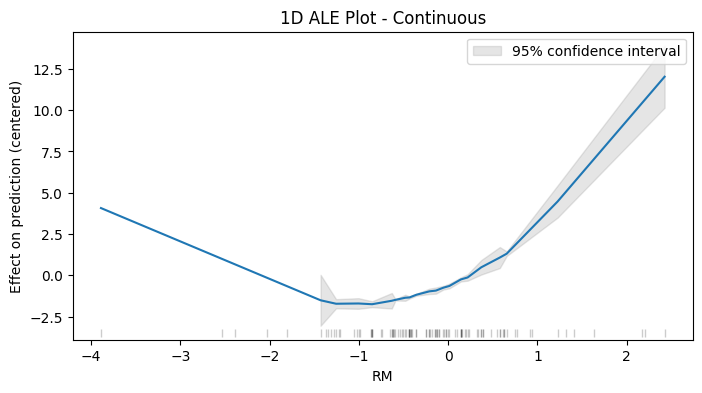

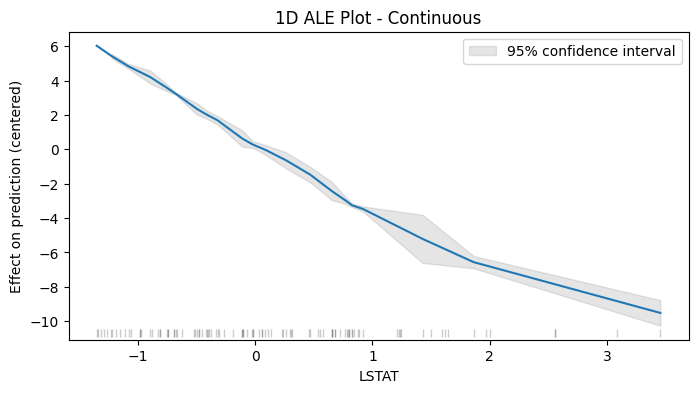

INFO:PyALE._ALE_generic:Continuous feature detected.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
INFO:PyALE._ALE_generic:Continuous feature detected.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


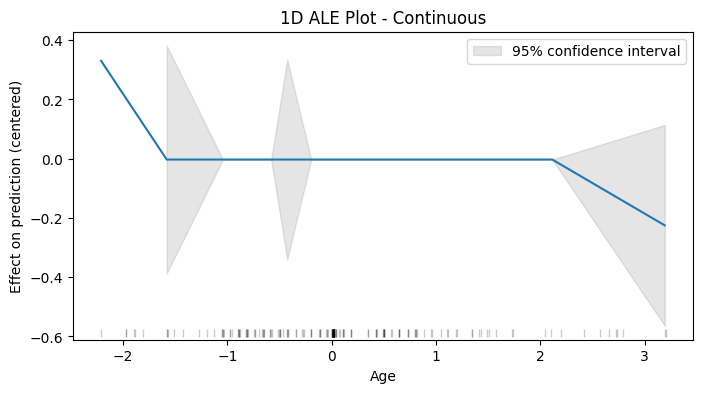

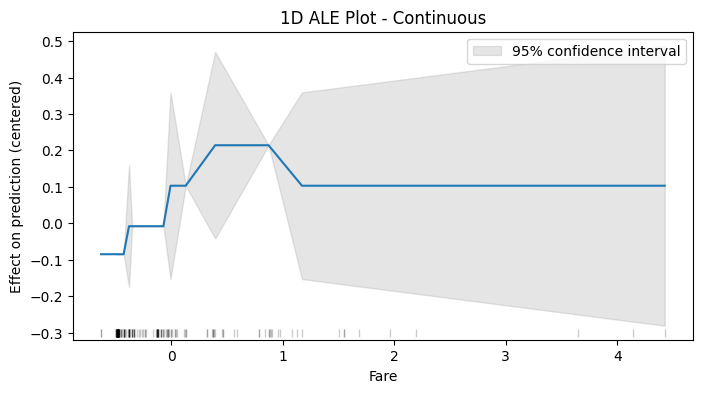

In [ ]:
# ALE plot for Boston Housing
ale(X=pd.DataFrame(X_test_boston_scaled, columns=feature_names_boston), model=mlp_regressor, feature=['RM'], grid_size=20)
ale(X=pd.DataFrame(X_test_boston_scaled, columns=feature_names_boston), model=mlp_regressor, feature=['LSTAT'], grid_size=20)

plt.show()

print("\n")

# ALE plot for Titanic dataset
ale(X=pd.DataFrame(X_test_titanic_scaled, columns=feature_names_titanic), model=mlp_classifier, feature=['Age'], grid_size=20)
ale(X=pd.DataFrame(X_test_titanic_scaled, columns=feature_names_titanic), model=mlp_classifier, feature=['Fare'], grid_size=20)

plt.show()

### Compare ALE with PDP and discuss any differences in the interpretability of these techniques.

----- <> -----

## 4. Global Surrogates - 🟡

### a. Train an interpretable model to approximate the predictions of the feed-forward neural network model.

In [ ]:
# train a Decision Tree to approximate the neural network for Boston Housing
surrogate_model_boston = DecisionTreeRegressor(max_depth=5, random_state=42)
surrogate_model_boston.fit(X_train_boston_scaled, mlp_regressor.predict(X_train_boston_scaled))

# evaluate the surrogate model's effectiveness
r_squared_boston = surrogate_model_boston.score(X_test_boston_scaled, mlp_regressor.predict(X_test_boston_scaled))
print(f"R-squared value for boston surrogate model: {round(r_squared_boston, 4)}")



# train a Decision Tree to approximate the neural network for Boston Housing
surrogate_model_titanic = DecisionTreeClassifier(max_depth=5, random_state=42)
surrogate_model_titanic.fit(X_train_titanic_scaled, mlp_classifier.predict(X_train_titanic_scaled))

# evaluate the surrogate model's effectiveness
r_squared_titanic = surrogate_model_titanic.score(X_train_titanic_scaled, mlp_classifier.predict(X_train_titanic_scaled))
print(f"R-squared value for titanic surrogate model: {round(r_squared_titanic, 4)}")

R-squared value for boston surrogate model: 0.7425
R-squared value for titanic surrogate model: 0.9452


### Analyse the surrogate model's effectiveness and discuss when such approximations are helpful.

----- <> -----